# 處理異常值

在統計學中，異常值是一個明顯不同於其他觀測值的數據點。異常值可能是由測量的變異性引起的，也可能表示實驗誤差；後者有時會從數據集中排除。異常值可能會在統計分析中引起嚴重問題。

記住，即使數據點是異常值，它仍然是一個數據點！在決定是否移除異常值時，請仔細考慮你的數據、其來源以及你的目標。每個情況都是不同的！

## 課程目標
* 了解異常值的不同數學定義
* 使用 Python 工具來識別和移除異常值

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def create_ages(num=50,sigma=13,num_samples=100,seed=42):
    np.random.seed(seed)
    samples_ages = np.random.normal(loc=num,scale=sigma,size=num_samples)
    samples_ages = np.round(samples_ages,decimals=0)
    return samples_ages

In [32]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

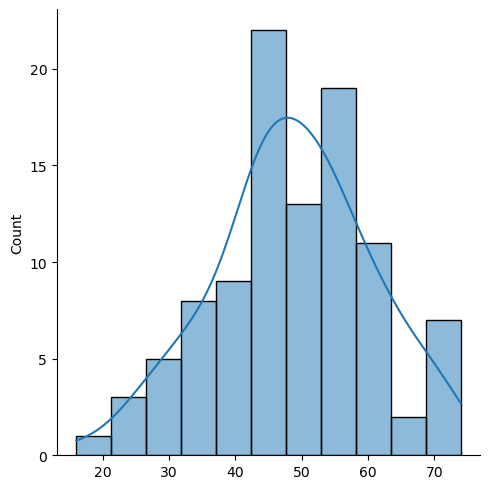

In [33]:

sns.displot(sample,kde=True)

boxplot 盒鬚圖：

中間的線 → 中位數 (median)。

箱子範圍 → 第 25 百分位數 (Q1) 到 第 75 百分位數 (Q3)。

箱子外的「鬚」 → 代表 Q1 - 1.5IQR 到 Q3 + 1.5IQR 的範圍。

超出鬚的點 → 代表「可能的離群值 (outliers)」

<Axes: >

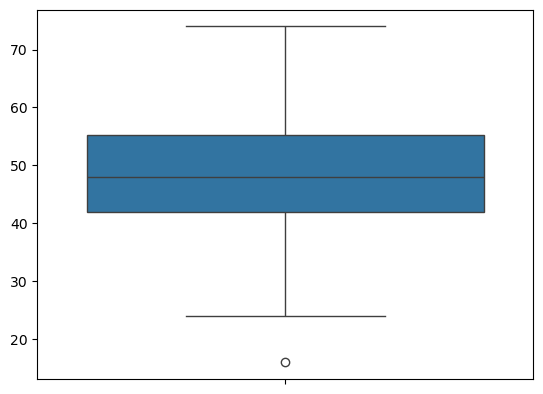

In [25]:
sns.boxplot(sample)

In [34]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [35]:
ser[ser > 18].describe()

count    99.000000
mean     48.989899
std      11.408460
min      24.000000
25%      42.500000
50%      48.000000
75%      55.500000
max      74.000000
dtype: float64

In [36]:
def fix_value(age):
    if age < 18:
        return 18
    else:
        return age
ser.apply(fix_value).describe()    

count    100.000000
mean      48.680000
std       11.766139
min       18.000000
25%       42.000000
50%       48.000000
75%       55.250000
max       74.000000
dtype: float64


在 Ames 房屋資料集中，我們來探索一下是否有任何極端的離群值。

In [37]:
df = pd.read_csv("./Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


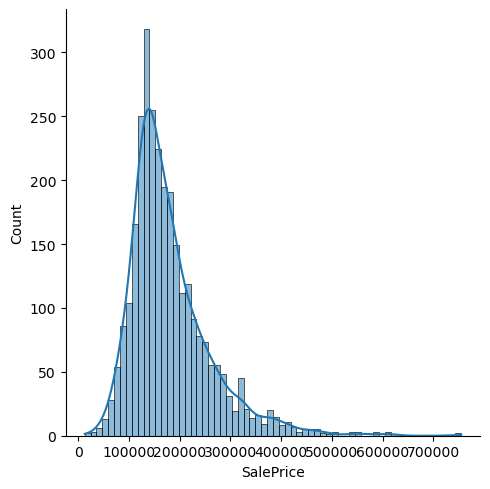

In [38]:
sns.displot(data=df["SalePrice"],kde = True)

In [40]:
number_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(30,30),dpi=300)
sns.heatmap(number_df.corr(),cmap="coolwarm")

<Axes: >

In [42]:
number_df.corr()["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

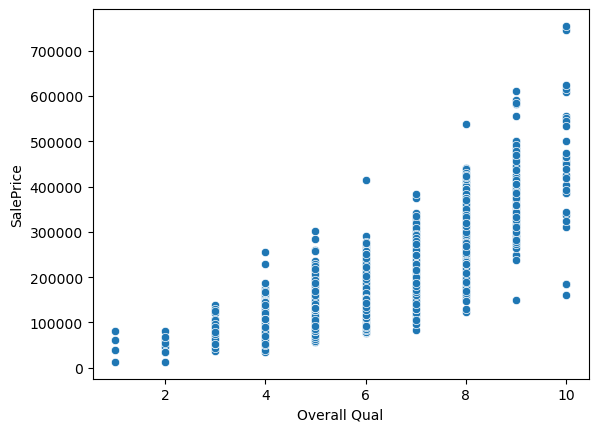

In [43]:
sns.scatterplot(x="Overall Qual",y = "SalePrice",data=df)

In [ ]:
df[(df["Overall Qual"] > 8)&(df["SalePrice"] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

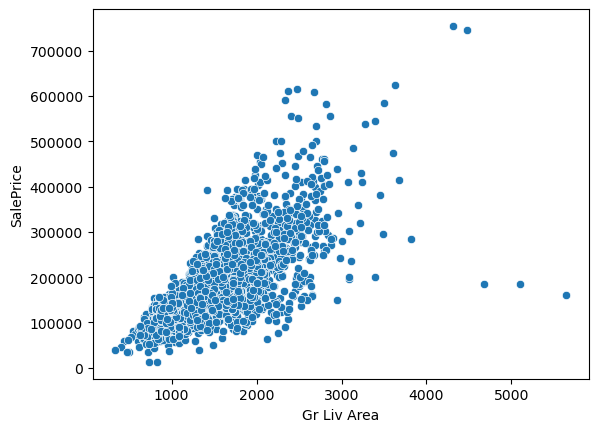

In [47]:
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df)

In [48]:
df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
inx_drop = df[(df["Gr Liv Area"] > 4000) & (df["SalePrice"] < 400000)].index
inx_drop

Index([1498, 2180, 2181], dtype='int64')

In [51]:
df.drop(inx_drop,inplace=True)


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

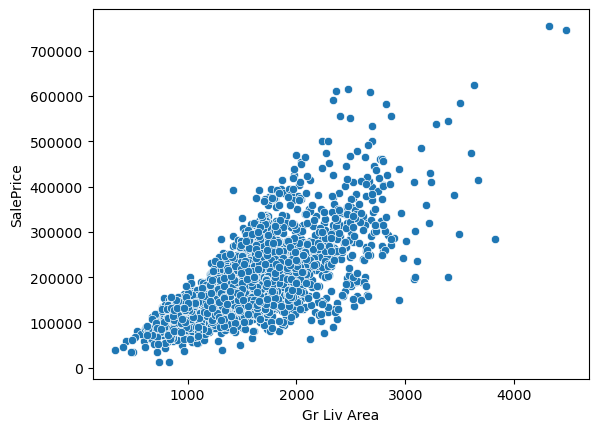

In [52]:
sns.scatterplot(x="Gr Liv Area",y="SalePrice",data=df)

In [55]:
newData = df[~((df["Overall Qual"] > 8) & (df["SalePrice"] < 200000)) ]
print(newData.describe())

                PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.926000e+03  2926.000000   2437.000000    2926.000000   2926.000000   
mean   7.143278e+08    57.397471     69.075503   10104.431989      6.089884   
std    1.887282e+08    42.661485     22.787266    7779.609824      1.405406   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284770e+08    20.000000     58.000000    7438.500000      5.000000   
50%    5.354532e+08    50.000000     68.000000    9429.000000      6.000000   
75%    9.071801e+08    70.000000     80.000000   11518.750000      7.000000   
max    1.007100e+09   190.000000    313.000000  215245.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2926.000000  2926.000000     2926.000000   2903.000000   2925.000000   
mean       5.564593  1971.317157     1984.244361    100.717189    439.021538   
std        1.111139    30.243477       20.859860

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

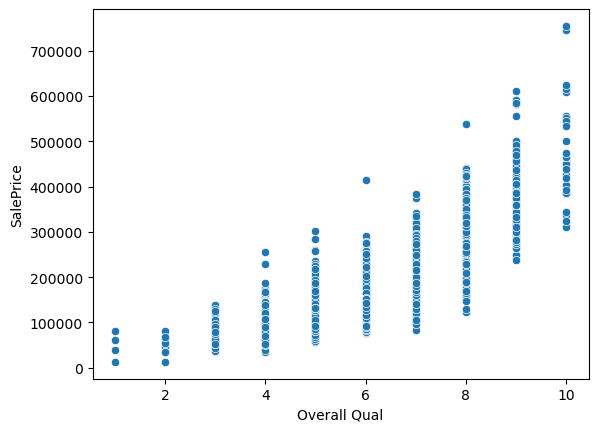

In [57]:
sns.scatterplot(x="Overall Qual",y = "SalePrice",data=newData)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("./Ames_outliers_removed.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [60]:
df.drop("PID",axis=1,inplace=True)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

In [62]:
null_sort_df = df.isnull().sum().sort_values(ascending=False)
null_sort_df

Pool QC         2915
Misc Feature    2822
Alley           2729
Fence           2355
Mas Vnr Type    1775
                ... 
Heating QC         0
MS Zoning          0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [64]:
(null_sort_df /len(df)) * 100

Pool QC         99.590024
Misc Feature    96.412709
Alley           93.235395
Fence           80.457807
Mas Vnr Type    60.642296
                  ...    
Heating QC       0.000000
MS Zoning        0.000000
1st Flr SF       0.000000
2nd Flr SF       0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [65]:
def percent_missing(df):
    p_nan = df.isnull().sum()/len(df) * 100
    p_nan = p_nan[p_nan > 0].sort_values(ascending=False)
    return p_nan
p_nan = percent_missing(df)
p_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Qual        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
BsmtFin SF 1       0.034165
Garage Cars        0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
dtype: float64

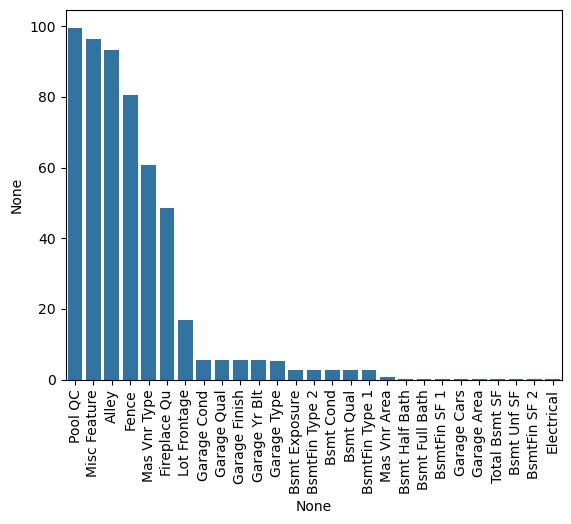

In [66]:
sns.barplot(x = p_nan.index,y = p_nan)
plt.xticks(rotation=90)
plt.show()

In [67]:
p_nan[p_nan < 1]

Mas Vnr Area      0.785787
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
BsmtFin SF 1      0.034165
Garage Cars       0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
dtype: float64

In [68]:
df[df["Total Bsmt SF"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [69]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   object 
 2   Lot Frontage     2437 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2927 non-null   object 
 7   Land Contour     2927 non-null   object 
 8   Utilities        2927 non-null   object 
 9   Lot Config       2927 non-null   object 
 10  Land Slope       2927 non-null   object 
 11  Neighborhood     2927 non-null   object 
 12  Condition 1      2927 non-null   object 
 13  Condition 2      2927 non-null   object 
 14  Bldg Type        2927 non-null   object 
 15  House Style      2927 non-null   object 
 16  Overall Qual     2927 non-null   int64  
 17  Overall Cond  

數值型地下室欄位包括：

- BsmtFin SF 1：地下室完成面積 1
- BsmtFin SF 2：地下室完成面積 2
- Bsmt Unf SF：地下室未完成面積
- Total Bsmt SF：總地下室面積
- Bsmt Full Bath：地下室全浴室數量
- Bsmt Half Bath：地下室半浴室數量

In [71]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [72]:
p_nan = percent_missing(df)
p_nan

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Mas Vnr Type      60.642296
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Yr Blt      5.432183
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
BsmtFin Type 1     2.733174
Bsmt Cond          2.733174
Bsmt Qual          2.733174
Mas Vnr Area       0.785787
Electrical         0.034165
Garage Cars        0.034165
Garage Area        0.034165
dtype: float64